<a href="https://colab.research.google.com/github/mervenurerdogan/DuyguAnalizi/blob/main/DuyguAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YÜZ GÖRÜNTÜLERİNDEN DUYGU ANALİZİ**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive/CNN/DuyguAnalizi")


In [ ]:
!ls

data  images


**Uygulama Başlangıcı**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Activation,MaxPooling2D,Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import  ModelCheckpoint #eğitim yaparken kullanacağız




VeriSetimizi Yükledik

In [ ]:
root='/gdrive/My Drive/CNN/DuyguAnalizi/'
data=pd.read_csv(root + 'data/fer2013/fer2013.csv')
data.shape

(35887, 3)

Veri setimizi görelim

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Eğitim ve test için ne kadar data ayrılmış

In [ ]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

**Eğitim Verisi için Ön işlem Adımları**

In [ ]:
np.unique(data['Usage'].values.ravel())
print("eğitim setindeki örnek sayısı= %d"  %(len(data[data.Usage=="Training"])))

eğitim setindeki örnek sayısı= 28709


Eğitim işlemi için Training i alıyoruz

In [ ]:
train_data=data[data.Usage=="Training"] #train_data ya Training verilerini atadık


In [ ]:
#eğitim örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık
train_pixels = train_data.pixels.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [ ]:
#görünütüyü  48x48 piksel şeklinde göstermek için bir fonksiyon tanımlayalım
def show(img):
  show_image = img.reshape(48,48)

  plt.axis('off')
  plt.imshow(show_image ,cmap='gray')

  


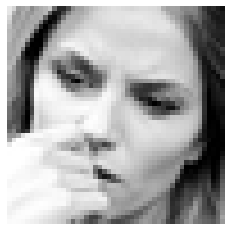

In [ ]:
#eğitim veri setinden bir görsel
show(train_images[2])

In [ ]:
train_labels_flat=train_data["emotion"].values.ravel()
train_labels_count=np.unique(train_labels_flat).shape[0]

print("Farklı yüz ifadelerinin sayısı: %d" %train_labels_count)

Farklı yüz ifadelerinin sayısı: 7


One Hot ile eğitim kümesindeki verilerin her birine düşen sınıf yani eğitim işlemi boyutunu görelim


In [ ]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot


In [ ]:
y_train=dense_to_one_hot(train_labels_flat,train_labels_count)

y_train=y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


**Test Verisi Ön İşleme Adımları**

In [ ]:
np.unique(data["Usage"].values.ravel()) 

print('Test verisetindeki örnek sayısı: %d'%(len(data[data.Usage == "PublicTest"])))

Test verisetindeki örnek sayısı: 3589


Eğitim İşlemi İçin Veri Kümesinde Ayrılmış Olan **PublicTest** kımını alıyoruz.

In [ ]:

test_data=data[data.Usage=="PublicTest"]
test_pixels=test_data.pixels.str.split(" ").tolist()

test_pixels=pd.DataFrame(test_pixels, dtype=int)
test_images=test_pixels.values
test_images=test_images.astype(np.float)

print(test_images.shape)

#test örneklerinin piksel değerleri bize tablo halinde yan yana verildiği için boşluklardan parse ederek liste olarak değişkene aldık


(3589, 2304)


Eğitim setinden örnek gösterelim

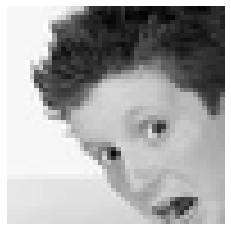

In [ ]:
show(test_images[20])

**One Hot ile test kümesindeki verilerin her birine düşen sınıfı yani eğitim işlemi boyutunu görelim.**

In [ ]:
test_labels_flat=test_data["emotion"].values.ravel()
test_labels_count=np.unique(test_labels_flat).shape[0]

y_test=dense_to_one_hot(test_labels_flat,test_labels_count)

y_test=y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


**TEST KÜMESİNDEN GÖRÜNTÜLER**

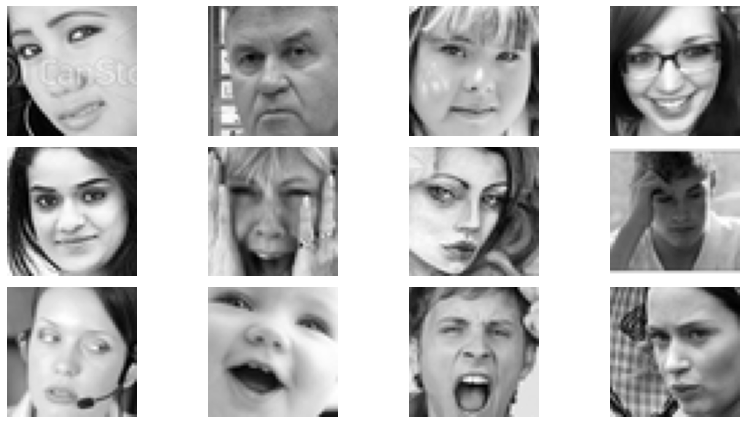

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3,4,i)
  plt.axis('off')

  image=test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()


***DERİN EVRİŞİMLİ SİNİR AĞI MODELİNİN TANIMLANMASI***


---
İlk olarak 48x48x1 lik giriş matrisimizi alıyoruz

64x64  3 kanallı filtrelik evrişim katmanı

max poooling 2x2

2.evrişim katmanı 32 filtre

max pooling 2x2

Flatten katmanı 






In [ ]:
model=Sequential()

#1. evrişim katmanı
model.add(Conv2D(64,3, data_format='channels_last',kernel_initializer="he_normal",input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2.katman
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.6))
#3.katman

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.6))

#6.katamn Flatten
model.add(Flatten()) #faltten edince veri azalıyor sinir ağğı uyguluycaz
# yani dense katmanı ekliyoruz
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))

#7.katman Çıkış kayamnı sınıflandırma yapılacak yer
model.add(Dense(7)) #7 tane duygumuza var o yüzden 7 sınıfa ayırıyoruz
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

#model özetini görüntüleme
model.summary()






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0

Eğitim ve test Kümelerinin eleman sayısı, yükseklik ve genişlik ve kanal sayısı bilgisi

In [ ]:
x_train=train_images.reshape(-1,48,48,1)
x_test=test_images.reshape(-1,48,48,1)

print("train ",x_train.shape)
print("test",x_test.shape)

train  (28709, 48, 48, 1)
test (3589, 48, 48, 1)


Eğitim ve Test Kümelerinde eleman ve duygu sınıf sayısı

In [ ]:
print("Train",y_train.shape)
print("Test",y_test.shape)

Train (28709, 7)
Test (3589, 7)


Modelimizi eğitmeye başlıyoruz

In [ ]:
# en başarılı ağırlıkları kaydet
checkpointer=ModelCheckpoint(filepath=root+"data/face_model.h5",verbose=1,
                              save_best_nly=True
                              )
epoch=10
batchSize=100

#modeli çalıştır
hist=model.fit(x_train,y_train,
               epochs=epoch,
               shuffle=True,
               batch_size=batchSize,
               validation_data=(x_test,y_test),
               callbacks=[checkpointer],
               verbose=2  )





Epoch 1/10
288/288 - 42s - loss: 1.9849 - accuracy: 0.2475 - val_loss: 1.6150 - val_accuracy: 0.3714

Epoch 00001: saving model to /gdrive/My Drive/CNN/DuyguAnalizi/data/face_model.h5
Epoch 2/10
288/288 - 8s - loss: 1.6419 - accuracy: 0.3577 - val_loss: 1.4864 - val_accuracy: 0.4291

Epoch 00002: saving model to /gdrive/My Drive/CNN/DuyguAnalizi/data/face_model.h5
Epoch 3/10
288/288 - 8s - loss: 1.5124 - accuracy: 0.4111 - val_loss: 1.5445 - val_accuracy: 0.4110

Epoch 00003: saving model to /gdrive/My Drive/CNN/DuyguAnalizi/data/face_model.h5
Epoch 4/10
288/288 - 8s - loss: 1.4428 - accuracy: 0.4407 - val_loss: 1.3661 - val_accuracy: 0.4765

Epoch 00004: saving model to /gdrive/My Drive/CNN/DuyguAnalizi/data/face_model.h5
Epoch 5/10
288/288 - 8s - loss: 1.3961 - accuracy: 0.4646 - val_loss: 1.3275 - val_accuracy: 0.4795

Epoch 00005: saving model to /gdrive/My Drive/CNN/DuyguAnalizi/data/face_model.h5
Epoch 6/10
288/288 - 8s - loss: 1.3591 - accuracy: 0.4760 - val_loss: 1.2785 - val_a

In [ ]:
#modeli json olarak kaydediyoruz
model_json=model.to_json()
with open(root + "data/face_model.json",'w') as json_file:
  json_file.write(model_json)
  

### **Eğitim sonucu elde edilen Eğitim ve Geçerleme (Validation) sonuçlarının grafiksel olarak ifade edilip ekrarna yazdırılması işlemleri.**

# Yeni Bölüm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


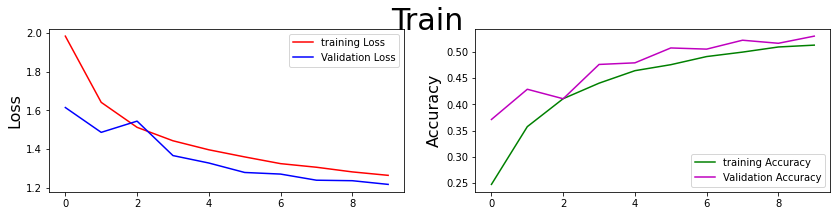

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.suptitle("Train" ,fontsize=30)
plt.ylabel('Loss',fontsize=16)
plt.plot(hist.history['loss'],color='r' ,label="training Loss")
plt.plot(hist.history['val_loss'],color='b' ,label="Validation Loss")
plt.legend(loc="upper right")#bilgileri nerye yazrıcaz onu belirledik



plt.subplot(1,2,2)

plt.ylabel('Accuracy',fontsize=16)
plt.plot(hist.history['accuracy'],color='g' ,label="training Accuracy")
plt.plot(hist.history['val_accuracy'],color='m' ,label="Validation Accuracy")
plt.legend(loc="lower right")#bilgileri nerye yazrıcaz onu belirledik


plt.show()

In [ ]:
#privete Test örnekleri ile test edelim

test=data[["emotion","pixels"]][data["Usage"]=="PrivateTest"]
test["pixels"]=test["pixels"].apply(lambda im: np.fromstring(im,sep=' '))

test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [ ]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [ ]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [ ]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest üzerindeki doğruluk durumu:", score)

PrivateTest üzerindeki doğruluk durumu: [1.2016050815582275, 0.5330175757408142]


FARKLI GÖRÜNTÜLER ÜZERİNDEN TEST İŞLEMİ YAPMAK

In [ ]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [ ]:
#En iyi ağırlıkları yükle
model_best=load_model('/content/drive/MyDrive/CNN/DuyguAnalizi/data/face_model.h5')


In [ ]:
os.chdir('/content/drive/MyDrive/CNN/DuyguAnalizi/images')

In [ ]:
!ls

emojiler  IMG_20190414_152335.jpg  unnamed.jpg	üzgün.jpg


In [ ]:
#test_image=x_test_private[60] #eğer veri kümesinden bir görsel denemek isterseniz burada [] içine rastgele bir görsel numarası atayarak test edebilirsiniz!

image_path = "/content/drive/MyDrive/CNN/DuyguAnalizi/images/img.jpg"

test_image_original = image.load_img(image_path) # orjinal renkli görüntü

test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
test_data = image.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])
results = model_best.predict(test_data, batch_size=1)
results

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0.13799874, 0.00297085, 0.12295035, 0.22607255, 0.33015755,
        0.01333038, 0.16651952]], dtype=float32)

SONUÇLARIN GÖRSELLEŞİRİLMESİ


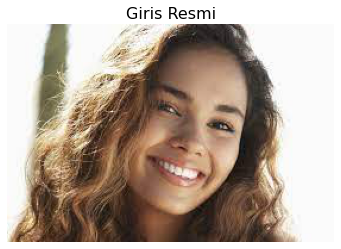

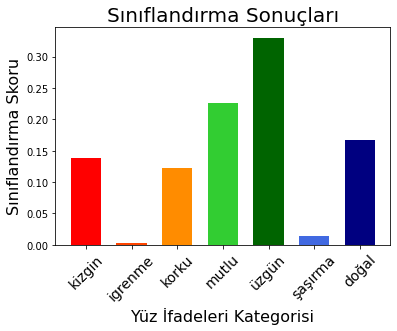

Sınıflandırma sonucu en yüksek oranla: üzgün


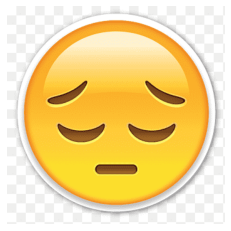

In [ ]:
#Sınıflarımız 7 adet duygu durumumuz

class_names=['kizgin' , 'igrenme', 'korku','mutlu' , 'üzgün','şaşırma','doğal']

ind=0.1+0.6*np.arange(len(class_names))
width=0.4  #bar genişliği

color_list=['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
#test resmimizi gösterelim

plt.imshow(test_image_original)
plt.title('Giris Resmi',fontsize=16)
plt.axis('off')
plt.show()

#sonuçlarmızı renklendirelim

for i in range(len(class_names)):
  plt.bar(ind[i] ,results[0][i] ,width ,color=color_list[i])

plt.title("Sınıflandırma Sonuçları", fontsize=20)
plt.xlabel("Yüz İfadeleri Kategorisi",fontsize=16)
plt.ylabel("Sınıflandırma Skoru",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("Sınıflandırma sonucu en yüksek oranla:", class_names[np.argmax(results)])

# en yüksek skorlu duyguya karşılık emoji çizdirelim

emojis_img = image.load_img('/content/drive/MyDrive/CNN/DuyguAnalizi/images/emojiler/%s.jpg' % str(class_names[np.argmax(results)]))

plt.imshow(emojis_img)
plt.axis('off')
plt.show()
